# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is the "Bike Sharing". 

There are two data files: "BikeSharing_training.csv" and "BikeSharing_Xtest.csv"<br/>
Both files have the following fields (except cnt, which is not available in "BikeSharing_Xtest.csv")

Features:
- season: season (1: winter, 2: spring, 3: summer, 4: fall)
- mnth: month (1 to 12)
- hr: hour (0 to 23)
- holiday: whether day is holiday or not
- weekday: day of the week
- workingday: 1 if day is neither weekend nor holiday, 0 otherwise
+ weathersit:
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorms + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min = -8, t_max = +39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min = -16, t_max = +50 (only in hourly scale)
- hum: Normalized humidity. The values are divided by 100 (max)
- windspeed: Normalized wind speed. The values are divided by 67 (max)

Target:
- cnt: count of total rental bikes


The training dataset, "BikeSharing_training.csv", contains 300 rows and 12 columns. This is the training set containing both the features and the target.<br/>
The test dataset, "BikeSharing_Xtest.csv", contains 200 rows and 11 columns. This is the test set, which only contains the features.<br/>

Your goal is to predict the number of total rental bikes (cnt) based on the features.

In [2]:
import numpy as np
import pandas as pd

Load the training data and view the first 5 lines

In [6]:
# Load the data
training_data = pd.read_csv('BikeSharing_training.csv')

# Show the first 5 lines
training_data.head(5)


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,12,16,0,5,1,1,0.42,0.4242,0.47,0.1940,283
1,4,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,330
2,3,9,1,0,0,0,2,0.62,0.5606,0.88,0.0000,88
3,3,6,22,0,3,1,1,0.70,0.6364,0.42,0.1940,183
4,3,7,12,0,1,1,2,0.80,0.7424,0.52,0.1642,314


## Data Exploration
We can plot a histogram of the dataframe for the features "temp", "atemp", "hum", and "windspeed" to understand the distributions of the continuous values.<br/>


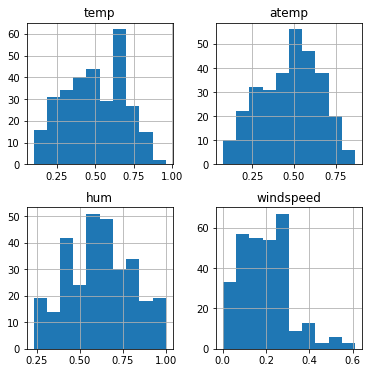

In [12]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
hists = training_data.hist(column = ['temp', 'atemp', 'hum', 'windspeed'], figsize = (6,6))


##### Q1. What can you infer from the histograms? <br/>
Ans- 

**temp:** The temperatures are somewhat concentrated at the lower end of the temperature distribution.

**atemp:** These temperatures are also somewhat concentrated at the lower end of the distribution. We expect this since it is directly related to the distribtution of temp.

**hum:** The humidities are somwhat evenly distributed around the mean, though there are a few gaps such as at 0.50.

**windspeed:** The wind speeds are heavily concentrated at the lower end of the distribution. We can infer from this histogram that the wind speed rarely ever gets above a normalized value of 0.3.

From all these histograms collectively, we can also see that there aren't many (if any) outliers in general in these features.


Compute the correlation matrix to get an understanding of the correlation between cnt and the other features.<br/>



In [13]:
training_data.corr()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.795990,-0.046306,-0.057180,-0.049248,0.087355,0.097812,0.403317,0.406946,0.155086,-0.110663,0.225385
mnth,0.795990,1.000000,0.000608,-0.012655,0.001790,0.045749,0.098688,0.270690,0.265519,0.116613,-0.005633,0.144026
hr,-0.046306,0.000608,1.000000,0.104970,0.029337,-0.083801,-0.117088,0.049154,0.042834,-0.375612,0.162829,0.387503
holiday,-0.057180,-0.012655,0.104970,1.000000,-0.065359,-0.216498,-0.059273,0.023122,0.020936,-0.064204,-0.043506,0.018659
weekday,-0.049248,0.001790,0.029337,-0.065359,1.000000,0.096844,-0.088959,-0.057797,-0.071621,-0.098027,0.073404,0.067401
workingday,0.087355,0.045749,-0.083801,-0.216498,0.096844,1.000000,0.131374,-0.007330,-0.001266,0.168470,-0.000534,-0.072353
weathersit,0.097812,0.098688,-0.117088,-0.059273,-0.088959,0.131374,1.000000,-0.014367,-0.018496,0.403589,-0.047412,-0.167125
temp,0.403317,0.270690,0.049154,0.023122,-0.057797,-0.007330,-0.014367,1.000000,0.992783,-0.037122,-0.096506,0.435036
atemp,0.406946,0.265519,0.042834,0.020936,-0.071621,-0.001266,-0.018496,0.992783,1.000000,-0.017675,-0.126852,0.430083
hum,0.155086,0.116613,-0.375612,-0.064204,-0.098027,0.168470,0.403589,-0.037122,-0.017675,1.000000,-0.228720,-0.321508


##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans - The diagonal measures the correlation between the variable and itself, so it will always be 1.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans - The correlation between x and y is always equal to the correlation between y and x.

##### Q4. Looking at the correlation matrix, if you had to choose one predictor for a simple linear regression model with cnt as the outcome, which one would you choose and why? <br/>
Ans - I would choose temp since, out of all the variables available to us, it has the highest correlation with cnt and thus would give the highest r-squared value in a simple linear regression.


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the mean and standard deviation for each feature, then subtract the mean from each feature, then divide the values of each feature by its standard deviation:

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on "temp", "atemp", "hum", and "windspeed."


In [14]:
from sklearn.preprocessing import StandardScaler

# initialize scaler object
scaler = StandardScaler()

# columns to normalize
cols_norm = ['temp', 'atemp', 'hum', 'windspeed']
# initialize new dataframe to pass into scaler
to_normalize = training_data[cols_norm]
# fit scaler to data
scaler.fit(to_normalize)
# store normalized features in variable "normalized"
normalized = scaler.transform(to_normalize)
# reassign columns to their normalized forms
training_data[cols_norm] = normalized

# display
training_data


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,12,16,0,5,1,1,-0.407573,-0.303588,-0.790860,0.000540,283
1,4,10,9,0,0,0,2,0.006557,0.044723,-0.359580,1.832666,330
2,3,9,1,0,0,0,2,0.627751,0.480398,1.419451,-1.586921,88
3,3,6,22,0,3,1,1,1.041881,0.916074,-1.060410,0.000540,183
4,3,7,12,0,1,1,2,1.559543,1.525330,-0.521310,-0.243307,314
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,23,0,2,1,1,-1.235832,-1.174364,1.042081,-0.731819,41
296,2,5,22,0,4,1,1,0.213622,0.219453,1.149901,0.000540,172
297,2,5,6,0,4,1,1,-0.821702,-0.912844,0.233430,0.489052,89
298,3,7,7,0,6,0,1,0.731284,0.741919,0.179520,-1.586921,45


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-

**Advantages:** Unlike min/max normalization, Z-score normalization handles outliers very well. Additionally, it accounts for both mean and variance.


**Disadvantages:** Unlike min/max normalization, Z-score normalization does not ensure that features are on the exact same scale. It also assumes a normal distribution, and this is not always valid.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- It doesn't seem to make too much sense to use Z-score normalization on temp, atemp, windspeed, and hum since they were all already normalized. As for whether or not Z-score is the specific normalization technique that is optimal, I think it could make sense for min-max normalization to be used (if it weren't already done) since there don't appear to be any significant outliers based on the hisograms above. In terms of the entire dataset, the scale of the different variables is different (e.g. month and hour can get up to 12 and 24, respectively), but this is not a problem since we will one-hot encode these variables (see below).

Overall, I don't think doing Z-score normalization on this dataset is necessary.

### One-Hot Encoding

"temp", "atemp", "hum" and "windspeed" are continuous values whereas the others contain discrete values. E.g. "mnth" can only take on the integers from 1 to 12. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Perform one-hot encoding on all the categorical features and print the shape of your encoded array

In [15]:
from sklearn.preprocessing import OneHotEncoder

# we need to one-hot encode season, mnth, hr,weekday, and weathersit

# create new dataframe with only season
season_encode = pd.DataFrame(training_data['season'])
#initialize encoder
season_enc = OneHotEncoder(drop = 'first')
# one-hot encode
season_df = pd.DataFrame(season_enc.fit_transform(season_encode).toarray())
# add prefix to column names
season_df = season_df.add_prefix('season_')

# repeat for other columns

# mnth
mnth_encode = pd.DataFrame(training_data['mnth'])
mnth_enc = OneHotEncoder(drop = 'first') 
mnth_df = pd.DataFrame(mnth_enc.fit_transform(mnth_encode).toarray())
mnth_df = mnth_df.add_prefix('mnth_')

# hr
hr_encode = pd.DataFrame(training_data['hr'])
hr_enc = OneHotEncoder(drop = 'first') 
hr_df = pd.DataFrame(hr_enc.fit_transform(hr_encode).toarray())
hr_df = hr_df.add_prefix('hr_')

# weekday
weekday_encode = pd.DataFrame(training_data['weekday'])
weekday_enc = OneHotEncoder(drop = 'first') 
weekday_df = pd.DataFrame(weekday_enc.fit_transform(weekday_encode).toarray())
weekday_df = weekday_df.add_prefix('weekday_')

# weathersit
weathersit_encode = pd.DataFrame(training_data['weathersit'])
weathersit_enc = OneHotEncoder(drop = 'first') 
weathersit_df = pd.DataFrame(weathersit_enc.fit_transform(weathersit_encode).toarray())
weathersit_df = weathersit_df.add_prefix('weathersit_')

# create dataframe without the variables that we one-hot encoded
training_to_conc = training_data.drop(columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit'])
# list of dataframes to concatenate
to_conc = [season_df, mnth_df, hr_df, weekday_df, weathersit_df, training_to_conc]
# concatenating dataframes
training_data_encoded = pd.concat(to_conc, axis = 1)

# Print the shape of your encoded X
training_data_encoded.shape


(300, 52)

In [17]:
# display encoded data
training_data_encoded


,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_5,weathersit_0,weathersit_1,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,-0.407573,-0.303588,-0.790860,0.000540,283
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,0.006557,0.044723,-0.359580,1.832666,330
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,0.627751,0.480398,1.419451,-1.586921,88
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1.041881,0.916074,-1.060410,0.000540,183
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0,1,1.559543,1.525330,-0.521310,-0.243307,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,-1.235832,-1.174364,1.042081,-0.731819,41
296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0.213622,0.219453,1.149901,0.000540,172
297,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,-0.821702,-0.912844,0.233430,0.489052,89
298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0,0,0.731284,0.741919,0.179520,-1.586921,45


##### Q7. What are the advantages and disadvantages of using One-hot encoding?<br/>
Ans-

**Advantages:** One-hot encoding allows categorical variables to be represented in a model-friendly format that doesn't establish a numerical hierarchy among these categorical variables. For example, we wouldn't want to store each weekday as a value from 0-6 since that would suggest that some days are greater than or less than others.

**Disadvantages:** One-hot encoding leads to the creation of a new column for every unique value in the initial categorical column, which often leads to dataframes with a very large amount of columns.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "cnt".

In [18]:
from sklearn.linear_model import LinearRegression

# Bulding and fitting the Linear Regression model 
X_df = training_data_encoded.drop(columns=['cnt'])
Y_df = training_data_encoded[['cnt']]

# convert to numpy arrays
X = X_df.to_numpy()
Y = Y_df.to_numpy()

# initialize and fit regression
lr = LinearRegression()
regression = lr.fit(X, Y)

# Evaluating the Linear Regression model by computing MSE on training set
from sklearn.metrics import mean_squared_error

Y_pred = regression.predict(X)
mean_squared_error(Y_pred, Y)


11285.732948075856

###### Q8. Print the value of bhat

In [20]:
print(regression.coef_)


[[  26.71501198   -7.97495888   60.79123577  -33.19421721  -11.9598258
   -21.73959075  -19.5062793   -31.52374803  -46.36317914  -54.08820774
   -49.92398051  -23.37760105   -7.3439333   -65.36570268  -30.66975815
    10.21113337  -12.51568885    9.50068885   -2.10631173   36.30800919
   158.25938267  351.36237752  176.38395473   82.7259382   149.769285
   204.93537706  202.91809514  152.24990438  181.34027065  226.670072
   402.70355909  345.22213814  295.51123972  173.40463121  107.84383604
   101.51101705   31.33268676   33.19610277   15.01867362    2.04462891
    20.75345973   18.22205292   24.42212125   -3.58338732 -106.47127914
    88.14484055    1.09007741  157.46885809  -88.7493333    -9.61226171
   -12.90022449]]


###### Q9. Is there a problem of multicolinearity? Explain what you can do<br/>
Ans- 
We attempted to avoid collinearity by dropping one of the columns for each of the variables that we one-hot encoded. However, there are still some variables (e.g. temp and atemp) that are highly correlated and thus we can drop one of these when finding the optimal subset of features to use in our regression in order to minimize multicollinearity.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [21]:
from sklearn.metrics import r2_score

def get_r2_score(x_cols, y_cols):

    # create the proper dataframe
    X_df = training_data_encoded[x_cols]
    Y_df = training_data_encoded[y_cols]

    # convert to numpy arrays
    X = X_df.to_numpy()
    Y = Y_df.to_numpy()

    # initialize and fit regression
    lr = LinearRegression()
    regression = lr.fit(X, Y)
    Y_pred = lr.predict(X)
    
    return r2_score(Y, Y_pred)


#### R2 score for model with "temp" as predictor and "cnt" as outcome

In [22]:
# Print R2 score
get_r2_score(x_cols = ['temp'], y_cols = ['cnt'])


0.18925663564676132

#### R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [23]:
# Print R2 score
get_r2_score(x_cols = ['temp', 'hum'], y_cols = ['cnt'])


0.2826295103178843

#### R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [27]:
# Print R2 score
get_r2_score(x_cols = ['temp', 'atemp', 'hum'], y_cols = ['cnt'])


0.28380026219213783

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

#### Adjusted R2 score for model with "temp" as predictor and "cnt" as outcome

In [28]:
def get_adjusted_r2(x_cols, y_cols):
    
    # compute r2, n, and k
    r2 = get_r2_score(x_cols = x_cols, y_cols = y_cols)
    n = training_data_encoded.shape[0]
    k = len(x_cols)
    
    # compute adjusted r2
    tmp1 = (1 - r2) * (n - 1)
    tmp2 = (n - k - 1)
    return (1 - tmp1/tmp2)

# Print Adjusted R2 score
get_adjusted_r2(x_cols = ['temp'], y_cols = ['cnt'])


0.18653602033013972

#### Adjusted R2 score for model with "temp", "hum" as predictors and "cnt" as outcome

In [29]:
# Print Adjusted R2 score
get_adjusted_r2(x_cols = ['temp', 'hum'], y_cols = ['cnt'])


0.2777987326095872

#### Adjusted R2 score for model with  "temp", "atemp", "hum" as predictors and "cnt" as outcome

In [30]:
# Print Adjusted R2 score
get_adjusted_r2(x_cols = ['temp', 'atemp', 'hum'], y_cols = ['cnt'])


0.27654148106570675

### K-fold Cross-Validation

However, adjusted R2 is not enough to help us achieve the best model. A more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error (MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y.
# The output: the average of MSE over the 5 folds.
# from sklearn.model_selection import KFold

# reinitialize training set
train = pd.read_csv("BikeSharing_training.csv")

# seed for reproducibility
import random
random.seed(11)

# define cross-validation function
def cross_val_mse(X, y):
    
    # initialize list of mse values
    mses = []
    # generate and shuffle random indices
    ins = [i for i in range(300)]
    random.shuffle(ins)
    # grab indices tat we will use to generate folds
    folds = [ins[i::5] for i in range(5)]
    
    for idxs in folds:
        # generate folds
        x_test=X.loc[idxs,:]
        x_train=X.loc[~X.index.isin(idxs)]
        y_test=y.loc[idxs]
        y_train=y.loc[~y.index.isin(idxs)] 
        
        # initialize and fit regression, predict
        reg = LinearRegression().fit(x_train,y_train)
        y_pred = reg.predict(x_test)
        # account for counts below the minimum value
        y_pred[y_pred < 1] = 1
        # track mse values
        mses.append(mean_squared_error(y_test, y_pred))
        
    return(sum(mses) / len(mses))


In [ ]:
# define function to format data based on selected features
def encoder(features):
    
    # store and format continuous and categorical features
    num_features = list(filter(lambda x: x in ["temp", "atemp", "hum", "windspeed"], features))
    l = list(filter(lambda x: x not in ["temp", "atemp", "hum", "windspeed"], features))
    
    # initialize and fit one-hot encoder
    enc = OneHotEncoder(handle_unknown = 'error', drop = 'first')
    enc.fit(train.loc[:,l])
    
    # grab selected features, format encoded data
    c_names = enc.get_feature_names(l)
    train_encoded = enc.transform(train.loc[:,l]).toarray()
    x_coded = pd.DataFrame(train_encoded, columns = c_names)
    x_coded = pd.concat([x_coded,train.loc[:,num_features]], axis = 1)
    
    return x_coded


In [32]:
# Using your above k-fold cross validation function, find the best combination of features (lowest averaged MSE)
from itertools import combinations

# initialize list of potential features to use
features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
combs = []

# check all combinations of 3 or more features
for L in range(3, len(features) + 1):
    for subset in combinations(features, L):
        combs.append(list(subset))

# initialize dictionary of scores
scores = {}
# generate score and store for every combination of variables
for comb in combs:
    x = encoder(train[comb])
    y = train['cnt']
    score = cross_val_mse(x,y)
    scores[", ".join(comb)] = score

# output best average score and corresponding features
temp = min(scores.values()) 
res = [key for key in scores if scores[key] == temp] 

print(temp)
print(res)


13639.841820337042
['season, hr, holiday, workingday, weathersit, temp, hum']


In [35]:
# Print the best features 
print(res[0].split(","))


['season', ' hr', ' holiday', ' workingday', ' weathersit', ' temp', ' hum']


### Test your model
Now, apply your best model to predict the target values from the test feature set "BikeSharing_Xtest.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use). The test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [36]:
# define new function (for test set) to format data based on selected features
def f_encoder(features):
    
    # store and format continuous and categorical features
    num_features = list(filter(lambda x: x in ["temp", "atemp", "hum", "windspeed"], features))
    l = list(filter(lambda x: x not in ["temp", "atemp", "hum", "windspeed"], features))
    
    # initialize and fit one-hot encoder
    enc = OneHotEncoder(handle_unknown = 'error', drop = 'first')
    enc.fit(final_x.loc[:,l])
    
    # grab selected features, format encoded data
    c_names = enc.get_feature_names(l)
    train_encoded = enc.transform(final_x.loc[:,l]).toarray()
    x_coded = pd.DataFrame(train_encoded, columns = c_names)
    x_coded = pd.concat([x_coded,final_x.loc[:,num_features]], axis = 1)
    
    return x_coded

# read in test set
final_x = pd.read_csv('BikeSharing_Xtest.csv')
# format test set
final_x_coded = f_encoder(['season', 'hr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum'])

# format training set including only the optimal features
x_train = encoder(['season', 'hr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum'])
# initialize training labels
y_train = train['cnt']

# fit regression
reg = LinearRegression().fit(x_train,y_train)

# predict and output prediction
y_pred = reg.predict(final_x_coded)
y_pred[y_pred < 1] = 1

# Output your prediction on test set as y_pred. It should be a 200 x 1 vector.
print(y_pred)


[300.49392011 177.92519499 419.4245133  376.87581612 432.33478919
 134.40766073   1.         227.29630823 141.6972331   60.74263354
  57.51514226 118.19460404 479.95842406 109.20426385  95.4573173
 149.89903955 332.5074636  309.27877677 348.11195515 137.63364679
   7.519902   302.84181295  29.41889079 141.18664005 221.28865247
   1.          52.47995762 338.58983318 242.39255676 232.42317836
 249.2839011  442.83434101   1.           1.          34.48697207
   1.         154.17333548 208.55010222 325.01243759  90.20345094
 378.37738466 504.40616911  52.43498657 445.31617847 240.30092067
 382.90420482 156.36469792 327.19117646 511.09953239 279.4685704
 320.0344613  289.22711213 287.46134368  69.76713241 229.54382389
   1.         341.8361081  328.45210118   1.           1.
 213.10540623 410.48962248 100.04329691 280.5764834  158.45211763
 211.92714015  33.07452937 317.03058302 216.69072755  78.72171277
 625.76728866 298.73007649 146.49587916 498.88170183 484.43608862
 446.68799491   1.  

In [42]:
y_pred.shape # checks out


(200,)